In [1]:
##Regresion logistica:
#Buscamosa una variable categorica, osea el resultado es una etiqueta o grupo.
#Se utiliza la ecuacion sigmoide Es el motor de la Regresión Logística. Su trabajo es convertir cualquier número 
#en una probabilidad entre 0 y 1.

#La Regresión Logística, a pesar de su nombre, no es para predecir números, sino para Clasificar.


#### Dataset de datos de cancer de mama, Wisconsin Breast Cancer Dataset

Clasificación binaria con tumores malignos y benignos

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
#En lugar de solo dividir tus datos en 80/20 una vez, 
# esta herramienta divide los datos en muchas partes y entrena el modelo varias veces.
from sklearn.model_selection import cross_validate
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
#Contiene datos y df
from sklearn import datasets
#load_breast_cancer(), funcion que descarga todo el dataset
cancer_datos = datasets.load_breast_cancer()
#Le estamos pidiendo a python que nos de info sobre todo lo que este en el objeto
#Contiene las variables independientes del dataset(x) y target(0 o 1) muestra si el tumor es benigno o maligno
cancer_datos.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
#Describe el df
print(cancer_datos['DESCR'])
#569 pacientes
#

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [4]:
#Target:datos objetivo, es representado como una lista 
#:, es cuando quieres contar desde el principio y llegar hasta 20
cancer_datos['target'][:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [5]:
#target_names, me muestra las respuestas si es benigno(1) o maligno(0)
cancer_datos.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer_datos['feature_names']
#Cracteristicas

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
cancer_df = pd.DataFrame(cancer_datos['data'], columns = cancer_datos['feature_names'])
cancer_df['Objetivo'] = cancer_datos.target
cancer_df.head(5)



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
cancer_df.shape

(569, 31)

In [10]:
#cancer_df.Objetivo: Accede específicamente a la columna que creaste para los diagnósticos (donde están los 0 y 1).
#.value_counts(), funcion que cuenta cuantas veces aparece un unico valor en la tabla
cancer_df.Objetivo.value_counts()

Objetivo
1    357
0    212
Name: count, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
train_df, test_df = train_test_split(cancer_df, test_size= 0.2)

variables_entrenamiento = cancer_datos['feature_names']
variables_objetivo = 'Objetivo'
#Definimos una variable importante el tamaño del tumor:(una sola caracteristica)
columna_entrenamiento = 'worst area'


Text(0, 0.5, 'Maligno - Benigno')

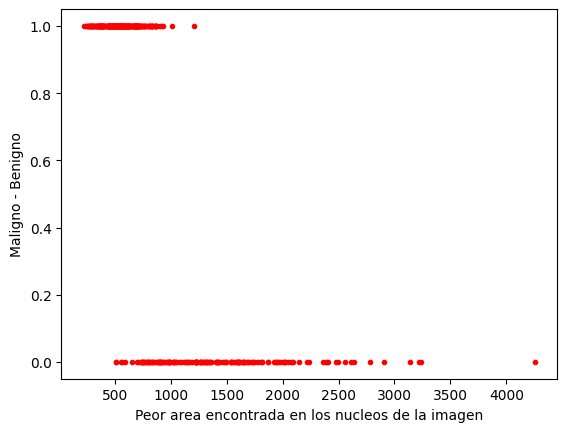

In [13]:
plt.plot(
    train_df[columna_entrenamiento], train_df.Objetivo, 'r.'
)
plt.xlabel('Peor area encontrada en los nucleos de la imagen')
plt.ylabel('Maligno - Benigno')

In [14]:
modelo_ols = LinearRegression()
#Un corchete devuelve una serie
#2 corchetes devuelve una dataframe con filas y columnas 
#En la libreria sklearn espera recibir un dataframe(matriz o tabla) para usar fir y predict
modelo_ols.fit(train_df[[columna_entrenamiento]], train_df[[variables_objetivo]])
predicciones = modelo_ols.predict(test_df[[columna_entrenamiento]])
predicciones[:10]
#Salen decimales poque la regresion lineal intenta formar una linea recta
#Los numeros mas cercanos a 1 es benigno y los mas cercanos a 0 es maligno

array([[0.89307791],
       [0.72677942],
       [0.76274085],
       [0.67928319],
       [0.82497942],
       [0.93051974],
       [0.93983394],
       [0.57793733],
       [0.7000705 ],
       [0.6669465 ]])

### Comparando Test y Predicciones - OLS

Text(0, 0.5, 'Maligno - Benigno')

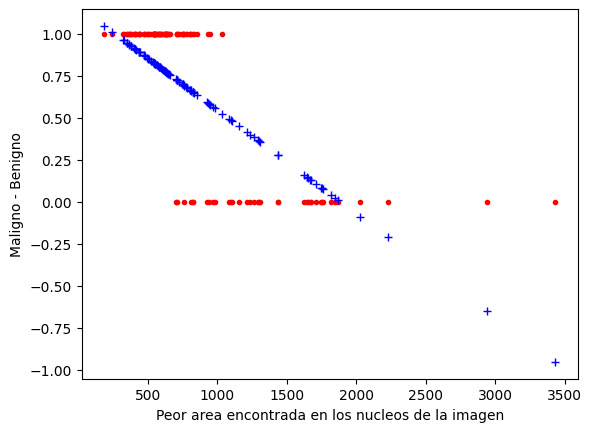

In [15]:
columna_entrenamiento = 'worst area'
plt.plot(test_df[columna_entrenamiento], test_df.Objetivo, 'r.') 
plt.plot(test_df[columna_entrenamiento], predicciones, '+b')
plt.xlabel('Peor area encontrada en los nucleos de la imagen')
plt.ylabel('Maligno - Benigno')
#1. Los puntos rojos (r.): La Realidad
#Son los datos reales del test_df. Como el cáncer o se tiene o no se tiene (es binario)

#2. Los signos más azules (+b): La Predicción Lineal
#Aquí es donde ves el error. Al usar una Regresión Lineal (modelo_ols), la computadora intenta trazar
#  una línea recta que pase "cerca" de todos los puntos.

#

### Función Logística
### $$  f(x)= \frac{L}{1+\epsilon^{-k(x-x_0)}}  $$

In [16]:
#Esta es la herramienta que va a transformar tus gráficos estáticos en paneles interactivos.
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from ipywidgets import interact
def fun_logistica(x, L=1, k=1, x0=0):
    return L / (1 + np.exp(-k*(x-x0)))

#El @ en Python se llama decorador.
#range(...): Crea los sliders (barritas) automáticamente. Por ejemplo, k = range(-5, 5) crea una barra
# que te permite mover el valor de $k$ desde -5 hasta 5 para ver cómo la curva se vuelve más plana o más parada.
@interact(L = range(1,10), k = range(-5,5), x0= range(-10,10))
#3. La Función de Graficado (plot_funcion_logit)
#np.linspace(-5*k, 5*k, 500): Crea 500 puntos en el eje $X$. Esto se hace para que la curva se vea suave y no "pixelada"
# o con líneas quebradas.
#y = fun_logistica(...): Calcula la altura para cada uno de esos 500 puntos usando los valores que elegiste en los sliders.

def plot_funcion_logit(L, k , x0):
    x = np.linspace(-5*k, 5*k, 500) 
    y = fun_logistica(x, k=k, L=L, x0=x0)
    #plt.figure(1): Abre un lienzo de dibujo.
    plt.figure(1)
    #plt.plot(x,y): Dibuja la curva uniendo los 500 puntos.
    plt.plot(x,y)
    #Fuerza a Python a mostrar el dibujo final. Como está dentro de @interact, cada vez que mueves una barrita, el código 
    #borra el dibujo viejo y hace uno nuevo instantáneamente.
    plt.show()

#L (Máximo): Define la altura máxima de la curva. En clasificación de cáncer,
#  esto suele ser 1, porque la probabilidad no puede pasar de 1.

#k (Crecimiento/Pendiente): Define qué tan "empinada" es la curva. Si k es muy alto, la "S" se vuelve casi un escalón recto. 
#Si es negativo, la curva baja en lugar de subir.

#x0 (Punto medio): Es el valor de $x$ donde la curva está exactamente a la mitad de su altura. En tu caso, sería el "área del
# tumor" que divide los casos sanos de los enfermos.


interactive(children=(Dropdown(description='L', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

In [ ]:
#predicciones, lista de resultaods crudos
#fun_logistica transforma numeros y los coloca en un rango de 0 a 1.
#map() es una funcion que dice toma todos los numeros de predicciones y pasa cada uno por la fun_logistica para 
#transformarlos.
# Los resultados finales se almacenan en una lista 'list()', para que se pueda leer y graficar 
predicciones_probabilidades = list(map(fun_logistica, predicciones))


Text(0, 0.5, 'Maligno - Benigno')

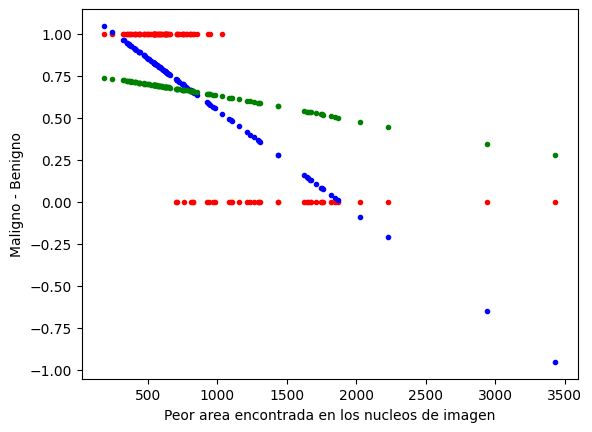

In [ ]:
plt.plot(test_df[columna_entrenamiento], test_df.Objetivo, 'r.')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades, '.g')
plt.xlabel('Peor area encontrada en los nucleos de imagen')
plt.ylabel('Maligno - Benigno')
#Puntos rojos:Verás puntos arriba (en el 1) que representan tumores Malignos y puntos abajo (en el 0) que representan
#  tumores Benignos.
#puntos azules: Es el resultado directo de la ecuación del modelo antes de pasar por la función logística.(No sirven)
#No sirven pq se pasan del rango 0 a 1
#verde: curva sigmoide, Es el resultado de aplicar tu fun_logistica a los puntos azules.
#Si un punto verde está en 0.8, el modelo dice: "Tengo un 80% de certeza de que es benigno".
#Si está en 0.1, dice: "Tengo un 90% de certeza de que es maligno".

##### Probando con Logistica K5

Text(0, 0.5, 'Maligno - Benigno')

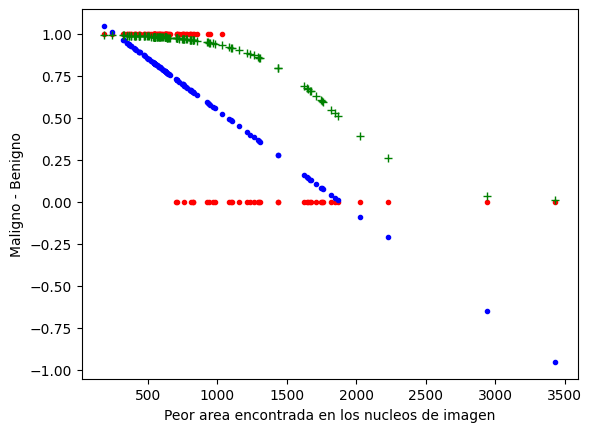

In [ ]:
from functools import partial
#k es la pendiente, controla la curvatura
#Para k pequeño cais siempre es curva suave(linea recta acostada)
#Para k iguala a 5 la curva es mas pronunciada y se ve como s.
#Para k muy grande la curva se cae empinadamente.
#Partial, configura la maquina para que k siempre sea 5, se multiplique por 5 la intensidad de la curva
funcion_logit_k5 = partial(fun_logistica, k = 5)
predicciones_probabilidades = list(map(funcion_logit_k5, predicciones))
plt.plot(test_df[columna_entrenamiento], test_df.Objetivo, 'r.')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades, '+g')
plt.xlabel('Peor area encontrada en los nucleos de imagen')
plt.ylabel('Maligno - Benigno')

#### Usando LogisticRegression  de sklearn

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#confusion_matrix: Es una tabla de $2 \times 2$ que muestra dónde acertó el modelo y dónde se confundió.
#accuracy_score (Exactitud):Es el porcentaje de predicciones correctas totales (tanto sanos como enfermos).
#precision_score (Precisión): De todas las personas que el modelo etiquetó como enfermos, ¿cuántas lo estaban de verdad?
#recall_score (Sensibilidad / Exhaustividad): De todas las personas que estaban enfermas en la realidad, ¿a cuántas 
# logró encontrar el modelo?
#f1_score (El equilibrio):Si tienes una Precisión excelente pero un Recall pésimo, el F1-Score será bajo. Solo será alto si 
# ambas métricas son buenas. Es el puntaje más honesto para modelos de clasificación.
#roc_curve y auc (La potencia del modelo): 
#Curva ROC: Es un gráfico que muestra cómo se comporta el modelo a medida que cambiamos el "umbral de duda"
# (ese punto de corte en la curva S).
#AUC (Área Bajo la Curva): Es un número que va de 0.5 a 1.0.
#0.9+: Es un modelo excelente.
#1.0: El modelo es perfecto, separa perfectamente sanos de enfermos.
#0.5: El modelo es igual que lanzar una moneda (puro azar).
#Si eres muy estricto: Solo dices que es "Maligno" cuando estás 100% seguro. Tu Precisión será excelente (no darás falsas alarmas),
#  pero se te escaparán muchos enfermos que tenían síntomas leves. Tu Sensibilidad bajará.
#Si eres muy precavido: Ante la mínima duda, dices que es "Maligno". Tu Sensibilidad será excelente (encontrarás a todos los enfermos),
#  pero darás muchísimas falsas alarmas a gente sana. Tu Precisión bajará.
#La media armónica "castiga" los valores extremos. Para tener un F1-Score alto (cercano a 1), necesitas que ambos números sean altos 
# y estén equilibrados.
#F1 alto: El modelo es confiable porque encuentra a la mayoría de los enfermos (buen Recall) y, 
# cuando dice que alguien está enfermo, suele tener razón (buena Precisión).
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [27]:
#Cargamos el dataset breast_cancer
cancer = datasets.load_breast_cancer()
x= cancer.data
y= cancer.target

In [32]:
#Dividimos los datos en conjunto de entrenamiento y prueba:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
#Escalar las caracteristicas (standarization) 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [34]:
print(f'Dimensiones de x_train_scaled: {x_train_scaled.shape}')
print(f'Dimensiones de x_test_scaled: {x_test_scaled.shape}')
print(f'Dimensiones de y_train: {y_train.shape}')
print(f'Dimensiones de y_test: {y_test.shape}')

Dimensiones de x_train_scaled: (455, 30)
Dimensiones de x_test_scaled: (114, 30)
Dimensiones de y_train: (455,)
Dimensiones de y_test: (114,)


In [35]:
#Iniciar y entrenar el modelo de regresion logistica:
## 'liblinear' es bueno para datasets pequeños
logistic_model = LogisticRegression(random_state= 42, solver = 'liblinear')
logistic_model.fit(x_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
#hacer predicciones en el conjunto de prueba:
#El modelo de Regresión Logística siempre hace dos cálculos:
#predict: Te da el resultado final "Sí o No" (0 o 1). Si la probabilidad es mayor a 0.5, te entrega un 1.
#predict_proba: Te da la probabilidad exacta (ej. 0.87). Se usa para crear la curva "S" que tanto te gusta,
# porque nos permite ver qué tan seguro está el modelo.
#El comando predict_proba no te devuelve una lista, ¡te devuelve una tabla con dos columnas!
#Columna 0: Probabilidad de que sea Maligno.
#Columna 1: Probabilidad de que sea Benigno.
y_pred_logistic = logistic_model.predict(x_test_scaled)
#Cuando colocamos [:,1], le decimos a python dame todas las filas y la segunda columna
#Seleccionamos la columna 1 porque queremos saber si es benigno
#y_pred_proba_logistic, se usa para:
#Dibujar la curva ROC: Para esta curva necesitas las probabilidades, no los ceros y unos.
#Calcular el AUC: El área bajo la curva requiere saber qué tan "seguro" estaba el modelo en cada predicción.
y_pred_proba_logistic = logistic_model.predict_proba(x_test_scaled)[:,1]
#predict: Te da el diagnóstico (0 o 1).
#predict_proba: Te da la certeza (0.0 a 1.0).

In [37]:
#Evaluar modelo:
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

In [ ]:
print('--- Resultados del Modelo de Regresion Logistica ----')
print(f'Presicion(Accuracy): {accuracy:.4f}')
print(f'Presicion(Presicion): {precision:.4f}')
print(f'Exhaustividad(Recall): {recall:.4f}')
print(f'Puntuacion F1(F1-Score): {f1:.4f}')
print(f'Matriz de Confusion')
print(conf_matrix)

#               Predicho Maligno 0      Predicho Benigno 1
#Real Maligno:  41(Verdadero.P)          2(Falso Negativo)
#Real Benigno:  1(Falso Positivo)        70(Verdadero Negativo)

#41 Verdaderos Malignos: El modelo detectó correctamente 41 casos de cáncer.
#70 Verdaderos Benignos: El modelo detectó correctamente 70 casos sanos.
#1 Falso Positivo (Susto): El modelo dijo que un paciente sano era "Maligno" (0). Es solo un susto.
#2 Falsos Negativos (PELIGRO): Aquí está el cambio. El modelo le dijo a 2 personas que tenían cáncer que eran "Benignos"
#  (1) y las mandó a casa.


--- Resultados del Modelo de Regresion Logistica ----
Presicion(Accuracy): 0.9737
Presicion(Presicion): 0.9722
Exhaustividad(Recall): 0.9859
Puntuacion F1(F1-Score): 0.9790
Matriz de Confusion
[[41  2]
 [ 1 70]]


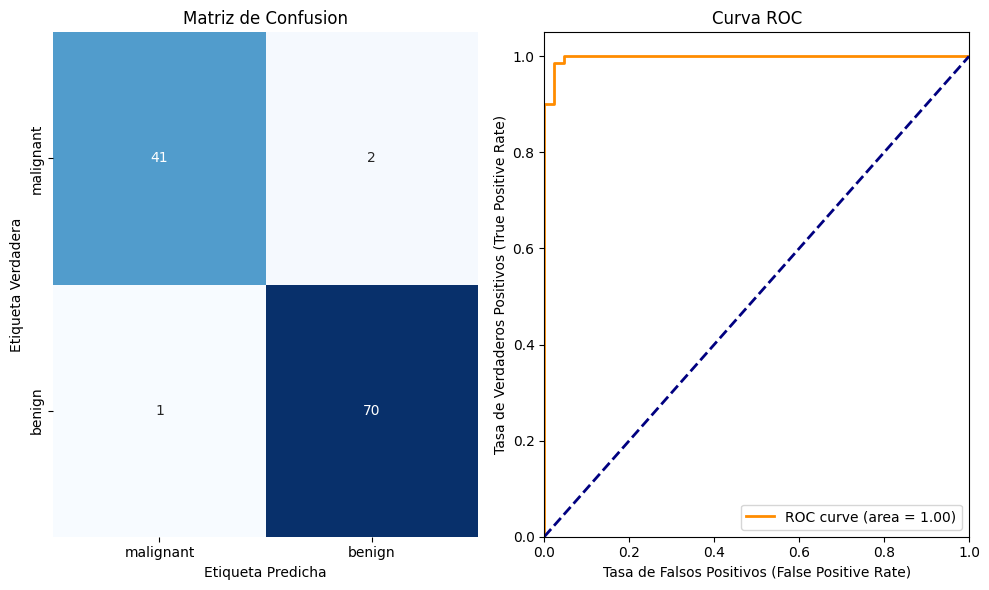

In [ ]:
plt.figure(figsize = (10,6))
#Grafica de matriz de confusion:
#Se ve el diseño del grafico:
#Divide mi hoja en 1 fila y 2 columnas" (es decir, reserva espacio para dos dibujos, uno al lado del otro).
plt.subplot(1, 2, 1) #1 fila, 2 columnas, 1er grafico
#fmt: formato y el 'd' significa decimal o entero
#cbar: barra de color
#Es esa reglita vertical que suele aparecer al lado de los mapas de calor para indicar qué color representa qué número.
#Al poner cbar=False, le estás diciendo: "No me pongas la barrita de escala, solo quiero ver los cuadros".
#cmap es "Colormap". 
#El color se asigna automáticamente. El número más alto de tu matriz (que es 70) recibirá el azul más oscuro, y el más
#  bajo recibirá el celeste casi blanco.
#Tu variable y_test tiene números (0 y 1). Si no pones target_names, los ejes dirán "0" y "1".
#cancer.target_names es una lista que viene dentro del dataset original y contiene las palabras: ['malignant', 'benign'].
#Al ponerlo en xticklabels y yticklabels, le estás diciendo a Seaborn: "En lugar de escribir 0 y 1, escribe los nombres 
# reales de las enfermedades"
sns.heatmap(conf_matrix, annot=True, fmt = 'd', cmap='Blues', cbar=False,
            xticklabels= cancer.target_names, yticklabels= cancer.target_names)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusion')

#Grafica de la curva ROC:
#TPR (True Positive Rate / Sensibilidad): Es el porcentaje de enfermos que el modelo encuentra.
#FPR (False Positive Rate): Es el porcentaje de gente sana que el modelo marca como enferma por error.
#Thresholds (Umbrales): Son todos los puntos de corte (0.1, 0.2, 0.5, etc.) que el modelo prueba para 
# ver cómo cambian el TPR y el FPR
plt.subplot(1,2,2) #1 fila, 1 columna, 2do grafico
fpr ,tpr, thresholds = roc_curve(y_test, y_pred_proba_logistic)
#La función auc (Area Under the Curve) calcula el área que queda debajo de la línea naranja. Matemáticamente,
#  integra los puntos de la curva (formados por pares de FPR y TPR). Si el área es grande (cercana a 1),
#  significa que el modelo es muy bueno separando las dos clases.
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color= 'darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#Es la línea punteada azul que va del (0,0) al (1,1).
#Representa a un modelo que elige al azar
#Tu objetivo: Que tu curva naranja esté lo más lejos posible de esta línea azul, empujada hacia la esquina superior 
# izquierda. Si tu curva naranja estuviera sobre la azul, tu modelo no serviría para nada.
plt.plot([0,1], [0,1], color= 'navy', lw=2, linestyle= '--')
plt.xlim([0.0, 1.0])
#Si pones el límite exactamente en 1.0, y tu curva es perfecta, la línea naranja se pegaría al borde superior del cuadro 
# y casi no se vería. Al poner 1.05, dejas un pequeño "aire" o margen arriba para que la línea se vea completa y clara.
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Tasa de Verdaderos Positivos (True Positive Rate)')
plt.title('Curva ROC')
plt.legend(loc='lower right')

#tight_layout() ajusta automáticamente los espacios entre los dibujos para que nada se solape y todo quepa bien en
#  la ventana.
plt.tight_layout()
plt.show()

#En la pendiente, la probabilidad de acertar (TPR) es exactamente igual a la probabilidad de fallar (FPR).
#Extremo Izquierdo (Arriba)(curva roc):Significa que el modelo logra un TPR de 0.9 
# (encuentra a casi todos los enfermos) mientras su FPR es casi 0.0 (no comete errores con los sanos).
#Todas las curvas ROC, sin excepción, deben empezar en $(0,0)$ y terminar en $(1,1)$.
#En $(0,0)$: El modelo es tan estricto que dice que nadie está enfermo. No encuentra enfermos (TPR=0) 
# pero tampoco comete errores (FPR=0).
#En $(1,1)$: El modelo es tan relajado que dice que todos están enfermos. Encuentra a todos los enfermos 
# (TPR=1) pero se equivoca con todos los sanos (FPR=1).




In [ ]:
results_df = pd.DataFrame({
    'Valor Real' : y_test,
    'Prediccion Modelo' : y_pred_logistic,
    'Prpbabilidad Positiva': y_pred_proba_logistic
})
print("Primeras 10 filas de la comparación de valores reales y predichos:")
results_df.head(10)
#Aunque tú definiste una función manual con $k=5$, el modelo de sklearn que entrenaste con fit(x_train_scaled, y_train)
#  hizo lo siguiente:
#Encontró sus propios "Pesos" ($w$): El modelo analizó las 30 características (área, simetría, etc.) y decidió qué tan 
# importante es cada una.
#Calculó el puntaje crudo ($z$): Para cada paciente, sumó todo: $z = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + b$
#Aplicó la Función Sigmoide: Ese valor $z$ lo metió en una función idéntica a la que tú hiciste (la curva S)
#El resultado de esa operación es lo que ves en tu columna de Probabilidad Positiva.
#a curva ROC no usa el "0" o el "1" final. La curva ROC agarra esa columna de Probabilidades y empieza a jugar con el
#  "umbral" (threshold):
#Tu función con $k=5$ era una representación visual. El modelo de Scikit-learn, en cambio, "aprendió" el valor de $k$ y
#  los pesos óptimos de cada variable a partir de los datos reales del dataset que cargaste



Primeras 10 filas de la comparación de valores reales y predichos:


,Valor Real,Prediccion Modelo,Prpbabilidad Positiva
0,1,1,8.780741e-01
1,0,0,7.908858e-06
2,0,0,2.852738e-03
3,1,1,9.994487e-01
4,1,1,9.999356e-01
5,0,0,8.481004e-11
6,0,0,1.246550e-09
7,0,0,3.162476e-02
8,1,1,6.136554e-01
9,1,1,9.992036e-01


In [19]:
# Máquina de Vectores de Soporte(SVM)

#1. El "Kernel Trick" (Máquinas de Soporte Vectorial - SVM)
#Da a entender que datos mezclados no pueden ser separados por una linea recta
#Esta fórmula proyecta los datos a un "espacio de mayor dimensión" (imagina que los puntos saltan hacia arriba en 3D). 
# Al hacer esto, los puntos que antes estaban mezclados ahora se pueden separar fácilmente 
# con un plano o una línea recta (la línea diagonal que ves en el gráfico F).

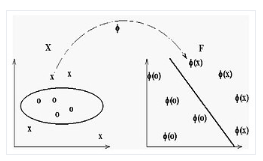

#### Función de base radial Gaussiana: separado por un hiperplano en el espacio transformado.

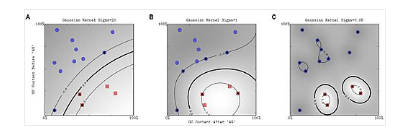

In [20]:
#1. la regresion logsitica usa esa curva para convertir una linea recta ene una probabilidad.
#Aquí es donde la cosa se pone interesante. Imagina que tienes tumores donde los muy pequeños son malos y 
# los muy grandes también,pero los medianos son buenos.
#La Regresión Logística a veces se queda corta, por lo que usamos un "Truco de Kernel". 
#Elevamos los datos a una potencia (como al cuadrado).
#Al elevarlos, los puntos "saltan" a otra dimensión (cuadro F) donde ahora sí es posible trazar una línea 
# recta para dividirlos perfectamente.
#3. Función de Base Radial / RBF: Se usa en modelos llamados SVM (Support Vector Machines), que son parientes 
# cercanos de la Regresión Logística.
#Ves cómo el modelo crea "burbujas" o islas para atrapar los datos.

#Parametro sigma: 
#Si es muy grande (Imagen A), el modelo es suave y generaliza.
#Si es muy pequeño (Imagen C), el modelo se vuelve súper estricto y crea círculos exactos alrededor de cada punto.



Ejemplo aleatorio con 550 registros

In [21]:
from sklearn.datasets import make_regression


In [22]:
x,y = make_regression(n_samples = 550, n_features = 4, n_targets = 1, random_state= 42)

In [23]:
x.shape, y.shape
#x es una amtriz 2d(contiene 550 filas y 4 columnas)
#y es un vector 1d, por eso queda vacio y no hay columnas

((550, 4), (550,))

#### Preparar Datos para SVM

#### Subtarea:
#### Dividir el dataset en variables predictoras (X) y la variable objetivo (y). Se considerará la normalización o estandarización de las características si es necesario para el modelo SVM.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
x_train, x_test, y_train,  y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((440, 4), (110, 4), (440,), (110,))

In [27]:
scaler = StandardScaler()

In [28]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
x_test_scaled.shape, x_train.shape

((110, 4), (440, 4))

In [30]:
x_train_scaled

array([[-0.92258331, -1.37133026, -1.45090508, -0.67020721],
       [ 1.23683325,  0.16158203, -0.57939837,  1.10601879],
       [ 0.53261696, -0.50381461, -0.3030425 ,  0.28663182],
       ...,
       [-1.45812127,  0.14749282,  0.34772683, -0.60040871],
       [-1.09844112, -0.24657933, -0.45496591, -1.18289413],
       [ 0.57703458,  2.21276805, -0.45943995,  0.34566775]],
      shape=(440, 4))

In [31]:
x_train

array([[-0.92323325, -1.35168461, -1.4066611 , -0.6115178 ],
       [ 1.31739407,  0.1975996 , -0.53523521,  1.04955272],
       [ 0.5866938 , -0.47490366, -0.25890497,  0.28328787],
       ...,
       [-1.47891157,  0.18335992,  0.39180401, -0.54624445],
       [-1.10570467, -0.21492103, -0.41081429, -1.09096643],
       [ 0.63278187,  2.27069286, -0.41528791,  0.33849641]],
      shape=(440, 4))

#### Entrenar Modelo SVM

#### Subtarea:
#### Configurar y entrenar un modelo de Support Vector Machine (SVM) utilizando los datos preparados. Se seleccionará un tipo de SVM (SVC para clasificación o SVR para regresión) según la naturaleza de la variable objetivo.

In [32]:
#SVC, es para clasificacion
#SVR, es para regresion
from sklearn.svm import SVR

In [33]:
#Se configura el cerebro del modelo:
#El kernel es la  funcion matematica que transforma tus datos
#'rbf' (Radial Basis Function): Es el kernel más potente y utilizado por defecto.
#Si un modelo no sigue una linea recta, entoces el modelo rbf forma curvas para asjutar mejor el patron
svr_model = SVR(kernel = 'rbf')

In [34]:
#Entrenamos el modelo:
#x_train_scaled, colocamos las caracteristicas ya escaladas.
#y_train, son las respuestas reales que el modleo debe aprender a predecir
svr_model.fit(x_train_scaled, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


#### Predecir Valores con el Modelo SVM
#### Utilizar el modelo SVM entrenado para predecir los valores en el conjunto de prueba y almacenar estas predicciones para su posterior evaluación y visualización.

In [35]:
y_pred = svr_model.predict(x_test_scaled)

In [36]:
y_pred.shape
#Nos da un vector 1D
#Al ser un modelo de regresión, el objetivo es predecir un único valor numérico por cada paciente.
#No genera una tabla, sino una fila de resultados.

(110,)

#### Evaluar el Modelo SVM
#### Evaluar el rendimiento del modelo SVM utilizando métricas de regresión adecuadas, como el Error Cuadrático Medio (MSE), el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R²).

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [38]:
mse = mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [39]:
mse,mae,r2

(6069.5442517034335, 61.348641531854135, 0.44733713808104814)

In [40]:
import matplotlib.pyplot as plt

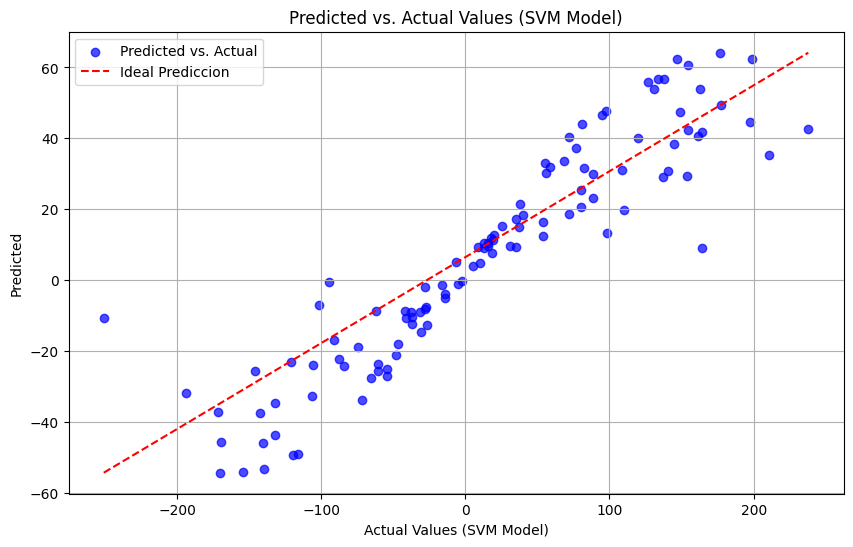

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color = 'red', linestyle= '--', label ='Ideal Prediccion')
plt.title('Predicted vs. Actual Values (SVM Model)')
plt.xlabel('Actual Values (SVM Model)')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()


#### Cargar Datos
#### Cargar el archivo `vehiculos_procesado.csv`

In [42]:
import pandas as pd

In [43]:
df= pd.read_csv(r"C:\Users\TEILS\Desktop\Machine lerning\vehiculos_procesado.csv")
df.head(5)

,fabricante,modelo,anio,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,...,traccion_tipo,transmision_tipo,tipo_combustible,tamanio_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla,consumo_std,desplazamiento_std,Unnamed: 21
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,...,dos,Automatica,Normal,pequenio,alto,alto,0.222671176,-0.589491,-0.604065,NaN
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,...,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185385,-1.372330,0.645817,NaN
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,...,dos,Automatica,Normal,pequenio,alto,alto,0.236588125,-0.785201,-0.604065,NaN
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,...,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185385,-1.372330,0.645817,NaN
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,...,dos,Automatica,Premium,grande,alto,alto,0.236588125,-0.785201,0.351727,NaN


In [44]:
#Para ver si hay NAN:
print(df.isnull().sum())

fabricante                  0
modelo                    724
anio                      724
desplazamiento            724
cilindros                 724
transmision               726
traccion                 1513
clase                     724
combustible               724
consumo                   724
co2                       724
clase_tipo                724
traccion_tipo             724
transmision_tipo          724
tipo_combustible          724
tamanio_motor_tipo        726
consumo_tipo              724
co2_tipo                  724
consumo_litros_milla      724
consumo_std               724
desplazamiento_std        724
Unnamed: 21             36781
dtype: int64


In [45]:

# Elimina la columna específica por su nombre
df = df.drop(columns=['Unnamed: 21'], errors='ignore')

In [46]:
df

,fabricante,modelo,anio,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,...,clase_tipo,traccion_tipo,transmision_tipo,tipo_combustible,tamanio_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla,consumo_std,desplazamiento_std
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,...,Vehiculos especiales,dos,Automatica,Normal,pequenio,alto,alto,0.222671176,-0.589491,-0.604065
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,...,Vehiculos especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185385,-1.372330,0.645817
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,...,Vehiculos especiales,dos,Automatica,Normal,pequenio,alto,alto,0.236588125,-0.785201,-0.604065
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,...,Vehiculos especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185385,-1.372330,0.645817
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,...,Carros medianos,dos,Automatica,Premium,grande,alto,alto,0.236588125,-0.785201,0.351727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,smart,fortwo coupe,2015,1.0,3.0,Automatic (AM5),Rear-Wheel Drive,Two Seaters,Premium,36,...,Carros_pequenios,dos,Automatica,Premium,muy pequenio,muy bajo,muy bajo,0.105150278,3.128994,-1.706902
36787,smart,fortwo coupe,2016,0.9,3.0,Automatic (AM6),Rear-Wheel Drive,Two Seaters,Premium,35,...,Carros_pequenios,dos,Automatica,Premium,muy pequenio,muy bajo,muy bajo,0.108154571,2.933284,-1.780424
36788,smart,fortwo coupe,2016,0.9,3.0,Manual 5-spd,Rear-Wheel Drive,Two Seaters,Premium,34,...,Carros_pequenios,dos,Manual,Premium,muy pequenio,muy bajo,muy bajo,0.111335588,2.737575,-1.780424
36789,smart,fortwo coupe,2017,0.9,3.0,Automatic (AM6),Rear-Wheel Drive,Two Seaters,Premium,35,...,Carros_pequenios,dos,Automatica,Premium,muy pequenio,muy bajo,muy bajo,0.108154571,2.933284,-1.780424


In [47]:
#describe(), se describe columnas numericas
#count mira cuantos datos hay
#round(2), es para redondear a 2 decimales
df.describe().round(2)

,desplazamiento,cilindros,co2,consumo_std,desplazamiento_std
count,36067.00,36067.00,36067.00,36067.00,36067.00
mean,3.84,5.71,469.81,0.02,-0.03
std,33.28,1.75,117.65,1.00,0.99
min,0.00,0.00,13.00,-2.55,-2.44
25%,2.20,4.00,386.39,-0.59,-0.82
50%,3.00,6.00,448.00,-0.00,-0.24
75%,4.20,6.00,522.76,0.58,0.65
max,2008.00,16.00,1269.57,7.43,3.73


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fabricante            36791 non-null  object 
 1   modelo                36067 non-null  object 
 2   anio                  36067 non-null  object 
 3   desplazamiento        36067 non-null  float64
 4   cilindros             36067 non-null  float64
 5   transmision           36065 non-null  object 
 6   traccion              35278 non-null  object 
 7   clase                 36067 non-null  object 
 8   combustible           36067 non-null  object 
 9   consumo               36067 non-null  object 
 10  co2                   36067 non-null  float64
 11  clase_tipo            36067 non-null  object 
 12  traccion_tipo         36067 non-null  object 
 13  transmision_tipo      36067 non-null  object 
 14  tipo_combustible      36067 non-null  object 
 15  tamanio_motor_tipo 

In [49]:
#Convertimos todos los objeto a numerico:(features importantes):
#Si no es numero lo pasa  Nan
df['anio'] = pd.to_numeric(df['anio'], errors = 'coerce')
df['consumo'] = pd.to_numeric(df['consumo'], errors = 'coerce')
df['consumo_litros_milla'] = pd.to_numeric(df['consumo_litros_milla'], errors = 'coerce')


In [50]:
#Ahora si tenemos todas las variables:
df.describe().round(2)

,anio,desplazamiento,cilindros,consumo,co2,consumo_litros_milla,consumo_std,desplazamiento_std
count,36057.00,36067.00,36067.00,36057.00,36067.00,36057.00,36067.00,36067.00
mean,2000.75,3.84,5.71,20.13,469.81,0.20,0.02,-0.03
std,10.39,33.28,1.75,5.09,117.65,0.05,1.00,0.99
min,1984.00,0.00,0.00,7.00,13.00,0.07,-2.55,-2.44
25%,1991.00,2.20,4.00,17.00,386.39,0.16,-0.59,-0.82
50%,2001.00,3.00,6.00,20.00,448.00,0.19,-0.00,-0.24
75%,2010.00,4.20,6.00,23.00,522.76,0.22,0.58,0.65
max,2018.00,2008.00,16.00,58.00,1269.57,0.54,7.43,3.73


In [51]:
#Seleccionm de variables:
df.columns

Index(['fabricante', 'modelo', 'anio', 'desplazamiento', 'cilindros',
       'transmision', 'traccion', 'clase', 'combustible', 'consumo', 'co2',
       'clase_tipo', 'traccion_tipo', 'transmision_tipo', 'tipo_combustible',
       'tamanio_motor_tipo', 'consumo_tipo', 'co2_tipo',
       'consumo_litros_milla', 'consumo_std', 'desplazamiento_std'],
      dtype='object')

In [52]:
columnas = ['desplazamiento', 'cilindros', 'consumo_litros_milla','anio', 'co2']

In [53]:
#Creamos un nuevo dataframe o sobrescribimos el actual solo con esas columnas
df = df[columnas]

In [54]:
df

,desplazamiento,cilindros,consumo_litros_milla,anio,co2
0,2.5,4.0,0.222671,1984.0,522.764706
1,4.2,6.0,0.291185,1984.0,683.615385
2,2.5,4.0,0.236588,1985.0,555.437500
3,4.2,6.0,0.291185,1985.0,683.615385
4,3.8,6.0,0.236588,1987.0,555.437500
...,...,...,...,...,...
36786,1.0,3.0,0.105150,2015.0,244.000000
36787,0.9,3.0,0.108155,2016.0,246.000000
36788,0.9,3.0,0.111336,2016.0,255.000000
36789,0.9,3.0,0.108155,2017.0,248.000000


In [55]:
#Para ver si hay NAN:
print(df.isnull().sum())


desplazamiento          724
cilindros               724
consumo_litros_milla    734
anio                    734
co2                     724
dtype: int64


In [56]:
# Elimina cualquier fila que tenga AL MENOS un valor NaN en cualquiera de sus columnas
df = df.dropna(how='any', axis=0)
df

,desplazamiento,cilindros,consumo_litros_milla,anio,co2
0,2.5,4.0,0.222671,1984.0,522.764706
1,4.2,6.0,0.291185,1984.0,683.615385
2,2.5,4.0,0.236588,1985.0,555.437500
3,4.2,6.0,0.291185,1985.0,683.615385
4,3.8,6.0,0.236588,1987.0,555.437500
...,...,...,...,...,...
36786,1.0,3.0,0.105150,2015.0,244.000000
36787,0.9,3.0,0.108155,2016.0,246.000000
36788,0.9,3.0,0.111336,2016.0,255.000000
36789,0.9,3.0,0.108155,2017.0,248.000000


In [57]:
print(df.isnull().sum())

desplazamiento          0
cilindros               0
consumo_litros_milla    0
anio                    0
co2                     0
dtype: int64


In [58]:
#Se buscan las vairbales que mas correlacion tienen con co2 para poder predecirlo.
#df.corr(numeric_only=True), calcula el coeficiente de correlacion de pearson, entre todas las columnas numericas
#coeficiente entre 1 y -1 que mide la relacion entre 2 variables
#1 signficia que si una sube la otra tmb
#-1 signficia que si una baja la otra tmb
#numeric_only=True, se coloca para que pandas no correlacione columnas de texto
correlation_matrix = df.corr(numeric_only=True)

In [59]:
#correlation_matrix['co2'], nos enfocamos solo en la columna objetivo
#abs(), no importa si la correacion es + o -, por eso se pone valor absoluto(queremos saber q tan fuerte es)
#.sort_values(ascending=False), Ordenas los resultados de mayor a menor.
co2_correlations = correlation_matrix['co2'].abs().sort_values(ascending= False)
#.index.tolist(), extrae solo nombre sde columnas como clindros, litros_milla etc
selected_features = co2_correlations.drop('co2').head(5).index.tolist()

In [60]:
co2_correlations

co2                     1.000000
consumo_litros_milla    0.994330
desplazamiento          0.796257
cilindros               0.748453
anio                    0.220658
Name: co2, dtype: float64

In [61]:
selected_features

['consumo_litros_milla', 'desplazamiento', 'cilindros', 'anio']

#### Preprocesamiento de Datos
#### Preparar los datos para el modelo SVM. Esto incluye dividir el conjunto de datos en entrenamiento y prueba, y escalar las variables independientes seleccionadas.

In [62]:
x = df[selected_features]
y= df['co2']

x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [63]:
x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape

((28845, 4), (7212, 4), (28845,), (7212,))

In [64]:
scaler = StandardScaler()
x_train_scaled1 = scaler.fit_transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)


In [65]:
x_train_scaled1 ,  x_test_scaled1

(array([[-1.47596202, -1.25201337, -0.97564763,  1.37008544],
        [-1.70561837, -1.69618668, -1.54319806, -0.74605186],
        [ 0.20818464,  0.00647769,  0.15945324, -1.03461603],
        ...,
        [ 2.88750884,  1.19093986,  3.56475584, -0.84223992],
        [-0.70711247, -0.95589782, -0.97564763,  0.79295708],
        [ 0.45585325,  1.41302651,  0.15945324, -0.55367574]],
       shape=(28845, 4)),
 array([[ 1.41114653,  1.56108428,  1.29455411,  0.50439291],
        [-0.55733657, -0.5857534 , -0.97564763,  1.56246155],
        [-2.38970116, -1.69618668, -1.54319806, -1.32318021],
        ...,
        [-1.19527091, -1.25201337, -0.97564763,  0.9853332 ],
        [-0.84440702,  0.74676654,  0.15945324, -1.61174439],
        [ 0.20818464,  0.52467989,  0.15945324, -0.36129962]],
       shape=(7212, 4)))

#### Entrenar Modelo SVM

#### Entrenar un modelo de regresión Support Vector Machine (SVM) utilizando las 3 variables independientes seleccionadas y 'co2' como variable objetivo.

In [66]:
svm_model = SVR(kernel = 'rbf')
svm_model.fit(x_train_scaled1, y_train1)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


##### Predecir y Evaluar

##### Realizar predicciones de 'co2' en el conjunto de prueba usando el modelo SVM entrenado.

In [67]:
y_pred1 = svm_model.predict( x_test_scaled1)
y_pred1

array([636.04714189, 405.73062105, 298.87470403, ..., 326.96949802,
       416.80546028, 493.13366475], shape=(7212,))

#### Evaluar el Modelo SVM

In [68]:
#Calculando el error medio cuadratico:
mse = mean_squared_error(y_test1, y_pred1)

#Calculando el erro medio absoluto:
mae = mean_absolute_error(y_test1, y_pred1)

#Claculando R-squared (R2) score
r2= r2_score(y_test1, y_pred1)

In [ ]:
mse, mae, r2
#mae :Qué significa: En promedio, tu modelo se equivoca por 5.65 gramos de CO2 por cada vehículo.
#Si tus valores de CO2 andan por los 400 o 500, fallar por solo 5.65 es excelente. Es un error de apenas el 1%.
#mse: $5.65^2$ es aproximadamente 32. Si el MSE fuera exactamente el cuadrado del MAE, sería bajo. Pero si el MSE sube hasta 505,
#es porque el modelo tuvo algunos "grandes fallos" en unos pocos vehículos.
#(R-cuadrado), también conocido como el Coeficiente de Determinación:
#$R^2 = 1$: Tu modelo es perfecto. Predice el CO2 exacto para cada vehículo sin fallar ni un gramo.
#Si sale 0.98: Significa que tu modelo explica el 98% de por qué un vehículo emite más o menos CO2. Solo un 2% se debe a factores 
#que no tienes en tu tabla (como el estado del motor o la forma de conducir).

(505.47602285236985, 5.659720813929473, 0.9625657302213719)

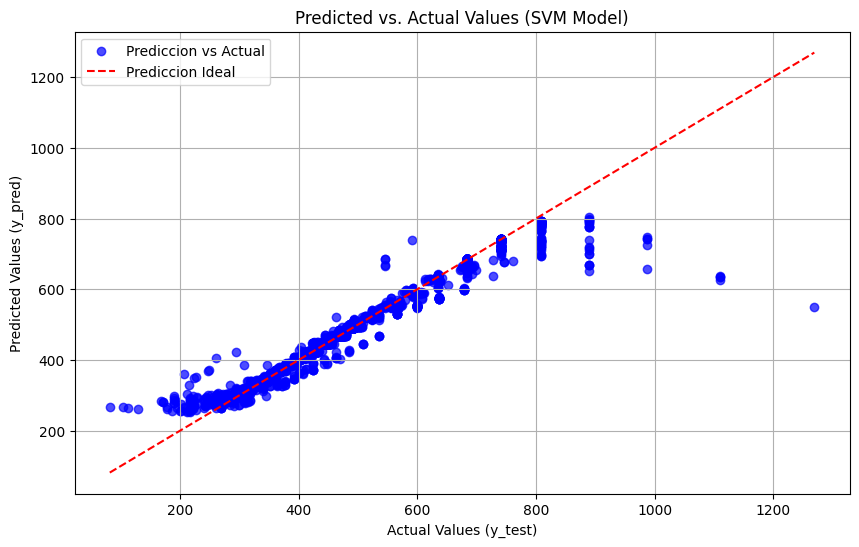

In [ ]:
## Visualizar Predicciones
plt.figure(figsize=(10,6))
plt.scatter(y_test1, y_pred1, alpha=0.7, color = 'Blue', label = 'Prediccion vs Actual')
#[min(y_test1), max(y_test1)] son listas de coordenadas.
# La primeras lista son las coordenadas de el eje x
#La segunda lista son las coord del eje y
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color ='red', linestyle= '--', label= 'Prediccion Ideal')
plt.title('Predicted vs. Actual Values (SVM Model)')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()

#Su posición en el eje X es su valor real (y_test1).
#Su posición en el eje Y es lo que el modelo SVR calculó (y_pred1).
#

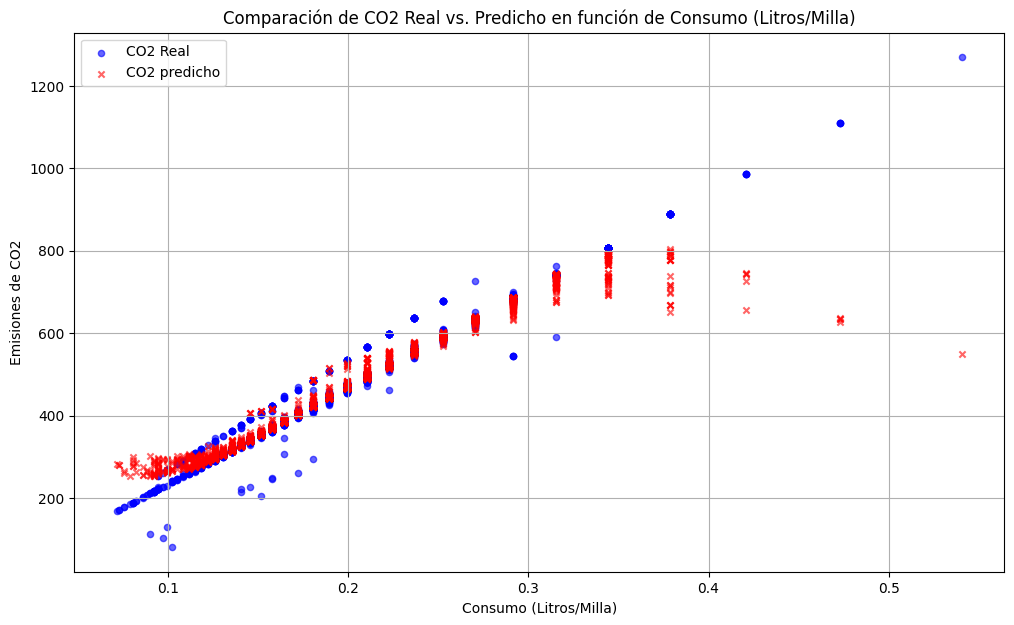

In [ ]:
plt.figure(figsize=(12,7))
#Valores reales:
#s es size es el tamaño.
plt.scatter(x_test1['consumo_litros_milla'], y_test1, alpha=0.6, color = 'Blue', label = 'CO2 Real', s=20)
#PLOT de valores predichos:
plt.scatter(x_test1['consumo_litros_milla'], y_pred1, color ='red', alpha=0.6, marker= 'x' , label= 'CO2 predicho', s=20)
plt.title('Comparación de CO2 Real vs. Predicho en función de Consumo (Litros/Milla)')
plt.xlabel('Consumo (Litros/Milla)')
plt.ylabel('Emisiones de CO2')
plt.legend()
plt.grid(True)
plt.show()

#Los puntos azules son la "verdad absoluta"
#Las "x" rojas son los cálculos de tu modelo SVR.
#